<a href="https://colab.research.google.com/github/ferdinand-lanvino/AES-Encryption-Classes/blob/master/commodity_predictor_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setup** <a name="setup"></a>

Clone the dataset

In [156]:
# Clone commodity-predictor repo.
!git clone -l -s git://github.com/ferdinand-lanvino/commodity-predictor.git
%cd commodity-predictor
!ls

Cloning into 'commodity-predictor'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 141 (delta 55), reused 62 (delta 16), pack-reused 0
Receiving objects: 100% (141/141), 1.74 MiB | 5.60 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/commodity-predictor/commodity-predictor/commodity-predictor/commodity-predictor
commodity_predictor_research.ipynb  Dataset
commodity-price-predictor.ipynb     README.md


Pull the updates if needed

In [157]:
!git pull

Already up to date.


Import Dependency

In [158]:
#basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import datetime # manipulating date formats

#visualization
import matplotlib.pylab as plt # basic plotting
import seaborn as sns # for prettier plots

#statistic
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 9

## **Preprocessing** <a name="preprocessing"></a>

Import combined dataset located in Dataset/Converted/commodity.csv

In [159]:
# pd.set_option('display.max_rows', 2000)
#Importing dataset 
dataset = pd.read_csv('Dataset/Converted/commodity.csv')
dataset['tanggal'] = pd.to_datetime(dataset['tanggal'],format='%d/%m/%Y')
#Drop all NaN values
dataset = dataset.dropna(how='any',axis=0)
print(dataset)

              komoditas    tanggal    harga
0                 Beras 2016-07-25  10900.0
1                 Beras 2016-07-26  10950.0
2                 Beras 2016-07-27  10950.0
3                 Beras 2016-07-28  10950.0
4                 Beras 2016-07-29  10950.0
...                 ...        ...      ...
29327  Gula Pasir Lokal 2020-05-20  17500.0
29328  Gula Pasir Lokal 2020-05-26  17650.0
29329  Gula Pasir Lokal 2020-05-27  17650.0
29330  Gula Pasir Lokal 2020-05-28  17650.0
29331  Gula Pasir Lokal 2020-05-29  17650.0

[29242 rows x 3 columns]


Grouping dataset by commodity type and then aggregating it by min-max date and min-max price

In [168]:
monthly_data = dataset.groupby("komoditas")["tanggal","harga"].agg({"tanggal":["min","max"]})
monthly_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


tanggal                               
                                    tanggal                harga          
                                        min        max       min       max
komoditas                                                                 
Bawang Merah                     2016-07-25 2020-05-29   22500.0   59250.0
Bawang Merah Ukuran Sedang       2016-07-25 2020-05-29   22500.0   59250.0
Bawang Putih                     2016-07-25 2020-05-29   23500.0   87500.0
Bawang Putih Ukuran Sedang       2016-07-25 2020-05-29   23500.0   87500.0
Beras                            2016-07-25 2020-05-29   10900.0   12650.0
Beras Kualitas Bawah I           2016-07-25 2020-05-29    9750.0   11900.0
Beras Kualitas Bawah II          2016-07-25 2020-05-29    9000.0   11500.0
Beras Kualitas Medium I          2016-07-25 2020-05-29   11400.0   14500.0
Beras Kualitas Medium II         2016-07-25 2020-05-29   10850.0   13650.0
Beras Kualitas Super I           2016-07-25 2020-05-29   12250.0   14000.0
Beras Kualitas Super II          2016-07-25 2020-05-29    9250.0   13100.0
Cabai Merah                      2016-07-25 2020-05-29   26250.0  102500.0
Cabai Merah Besar                2016-07-25 2020-05-29   26000.0  122500.0
Cabai Merah Keriting             2016-07-25 2020-05-29   22500.0  102500.0
Cabai Rawit                      2016-07-25 2020-05-29   22500.0  127500.0
Cabai Rawit Hijau                2016-07-25 2020-05-29   22500.0   97500.0
Cabai Rawit Merah                2016-07-25 2020-05-29   22500.0  160000.0
Daging Ayam                      2016-07-25 2020-05-29   27000.0   46250.0
Daging Ayam Ras Segar            2016-07-25 2020-05-29   27000.0   46250.0
Daging Sapi                      2016-07-25 2020-05-29  125000.0  147500.0
Daging Sapi Kualitas I           2016-07-25 2020-05-29  130000.0  160000.0
Daging Sapi Kualitas II          2016-07-25 2020-05-29  120000.0  137500.0
Gula Pasir                       2016-07-25 2020-05-29   12450.0   17700.0
Gula Pasir Kualitas Premium      2016-07-25 2020-05-29   13150.0   17750.0
Gula Pasir Lokal                 2016-07-25 2020-05-29   11750.0   17750.0
Minyak Goreng                    2016-07-25 2020-05-29   12450.0   14550.0
Minyak Goreng Curah              2016-07-25 2020-05-29   10500.0   13650.0
Minyak Goreng Kemasan Bermerk I  2016-07-25 2020-05-29   13000.0   15400.0
Minyak Goreng Kemasan Bermerk II 2016-07-25 2020-05-29   13150.0   15150.0
Telur Ayam                       2016-07-25 2020-05-29   17500.0   29250.0
Telur Ayam Ras Segar             2016-07-25 2020-05-29   17500.0   29250.0

Creating method for imputating dataset per commodity type

In [175]:
def imputating(commodity_name,dataset):
  print("-----------------------------------")
  print("Imputing "+commodity_name)

  #Get sub dataset per commodity type
  subdataset = dataset[dataset.komoditas==commodity_name]
  #Set index by tanggal (date)
  subdataset = subdataset[['tanggal','harga']].set_index('tanggal')
  #reindex
  subdataset.index = pd.DatetimeIndex(subdataset.index)

  subdataset_imputed = subdataset.asfreq('D')
  #filling NaN values with LOCF (Last Observation Carried Forward) algorithm using method Forward Fill
  subdataset_imputed['harga-imputed'] = subdataset.asfreq('D', method='ffill')
  plt.plot(subdataset_imputed)
  plt.title(commodity_name)
  plt.xlabel('Tanggal (Harian)')
  plt.ylabel('Harga (Kg)')
  subdataset_imputed = subdataset_imputed.drop(['harga'], axis = 1) 
  print(subdataset_imputed.info())
  return subdataset_imputed

Running the imputation

-----------------------------------
Imputing Cabai Rawit Merah
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1405 entries, 2016-07-25 to 2020-05-29
Freq: D
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   harga-imputed  1405 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB
None


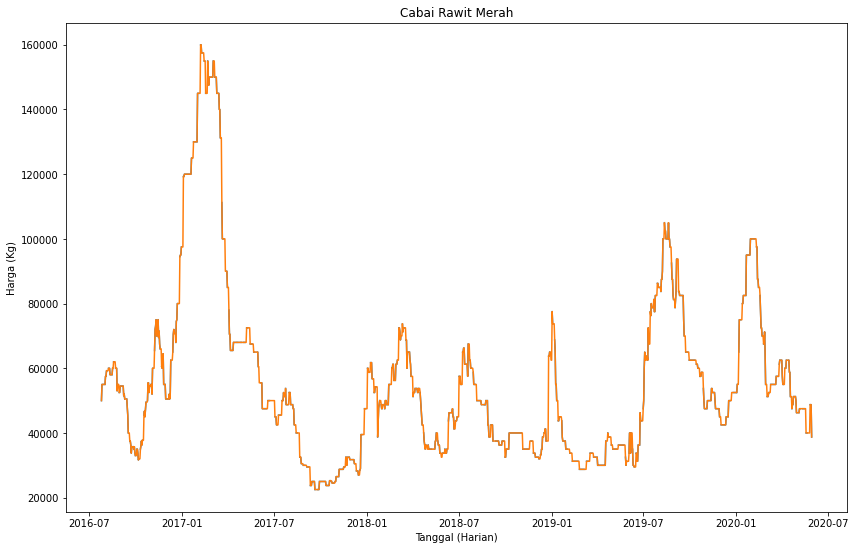

In [176]:
subdataset = imputating("Cabai Rawit Merah",dataset)

Rolling Windows

Text(0, 0.5, 'Harga (Kg)')

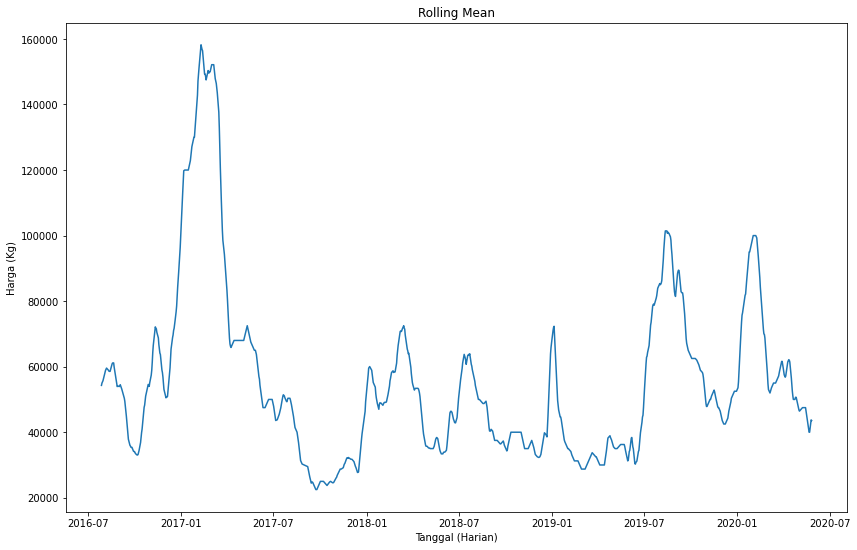

In [163]:
subdataset_rollmean = subdataset['harga-imputed'].rolling(7, center=True).mean()
subdataset_rollstd = subdataset['harga-imputed'].rolling(7, center=True).std()
plt.plot(subdataset_rollmean)
plt.title("Rolling Mean")
plt.xlabel('Tanggal (Harian)')
plt.ylabel('Harga (Kg)')

Rolling Mean & Std

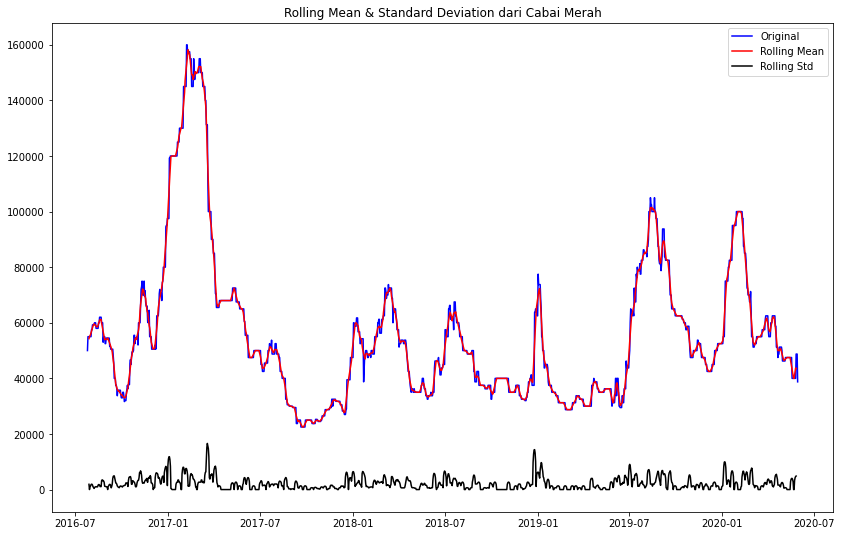

In [177]:
orig = plt.plot(subdataset, color='blue', label='Original')
mean = plt.plot(subdataset_rollmean, color='red', label='Rolling Mean')
std = plt.plot(subdataset_rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation dari Cabai Merah')
plt.show(block=False)

####**ACDF Test**

In [178]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(subdataset['harga-imputed'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -3.238660
p-value                           0.017853
#Lags Used                       14.000000
Number of Observations Used    1390.000000
Critical Value (1%)              -3.435063
Critical Value (5%)              -2.863622
Critical Value (10%)             -2.567878
dtype: float64


####**Data Transformation to achieve Stationarity**

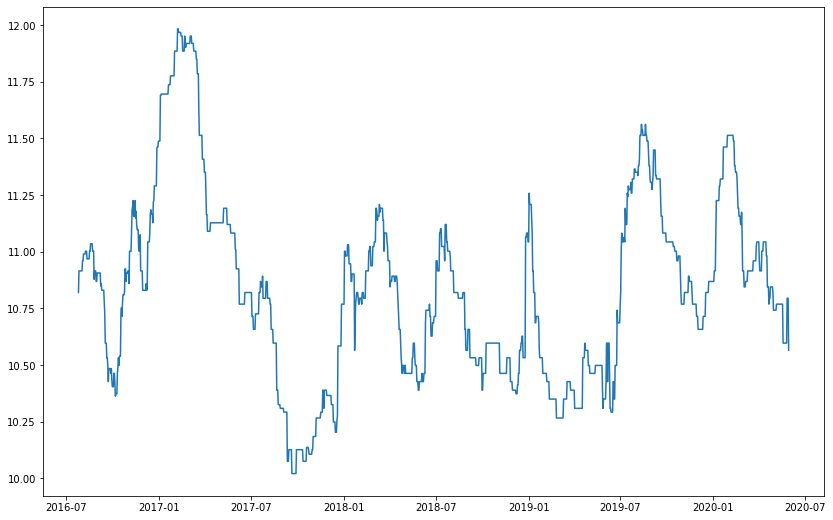

In [179]:
indexedDataset_logScale = np.log(subdataset)
plt.plot(indexedDataset_logScale)